In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from os import path

In [2]:
data_path = path.join('res', 'data.csv')

### Cargamos y mostramos el DataSet

In [3]:
df = pd.read_csv(data_path)
data = df.copy()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
print(data.shape)

(4600, 18)


## Analizando el DataSet

In [5]:
#Observamos cantidad de valores nulos y el tipo de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
data.describe()
#Observamos que hay varias caracteristicas con valor minimo cero como en el precio, baños, habitaciones, etc.
#Tambien observamos valores extremos(outliners) por ejemplo en el precio o en sqft_living

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
data.corr()
#Observamos las caracteristicas mas relacionadas con el precio de la vivienda

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [8]:
#Contamos los ceros que contiene cada columna y vemos que hay 49 viviendas con valor de precio cero.
data[data==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [9]:
#Vemos parte de las casas que tienen valor cero y no se observa nada raro que justifique ese valor
data[data["price"]==0].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA


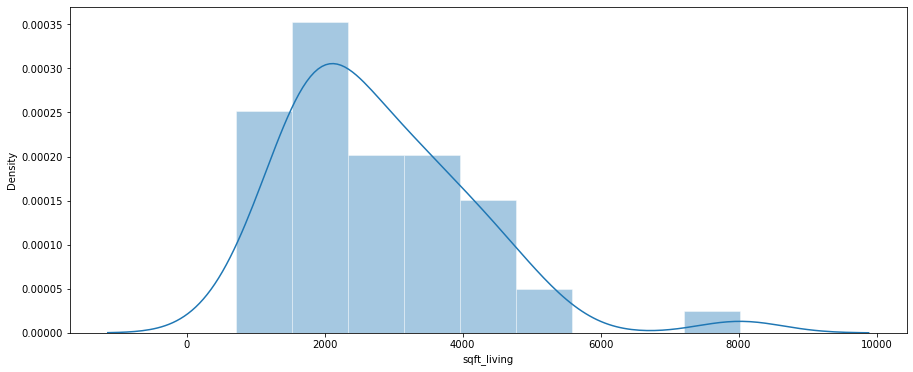

In [10]:
plt.figure(figsize=(15,6))
ax = sns.histplot(data[data["price"]==0].sqft_living,kde=True, stat="density", 
     kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
#Podemos ver que la mayoria de las casas con precio 0 se encuentran entre 1000 y 5000 "metroscuadrados" (sqft_living)

In [11]:
zero_price_data = data[['price', 'bathrooms', 'bedrooms', 'sqft_living', 'floors', 'yr_built']]
zero_price_data[zero_price_data["price"]==0].agg([min, max, 'mean', 'median'])
#Tambien vemos que las casas con precio 0 tienen de media 4 habitaciones, 2.5 baños y 2800 "metroscuadrados"

,price,bathrooms,bedrooms,sqft_living,floors,yr_built
min,0.0,1.00000,1.000000,720.000000,1.0,1920.000000
max,0.0,6.25000,6.000000,8020.000000,3.0,2013.000000
mean,0.0,2.69898,3.979592,2787.142857,1.5,1969.918367
median,0.0,2.50000,4.000000,2600.000000,1.5,1962.000000


In [12]:
#Hacemos una seleccion de las casas que cumplen media 4 habitaciones, 2.5 baños y 2800 "metroscuadrados"
selection = data[(data.bedrooms == 4) & (data.bathrooms > 1) & (data.bathrooms < 4) & (data.sqft_living > 2500) & 
         (data.sqft_living < 3000) & (data.floors > 1) & (data.floors < 3) & (df.yr_built > 1940) & (df.yr_built < 1990)]
selection.shape

(54, 18)

In [13]:
#Con estos datos obtenemos que la media del precio de las casas con estas caracteristicas
selection.price.mean()

635147.7101197593

In [14]:
#Sustituimos los precios de valor cero por el valor medio obtenido en el anterior analisis
data['price'].replace(to_replace = 0, value = 635000, inplace = True)
len(data[(data['price'] == 0)])

0

# Modificando Datos

## Lidiando con los ceros y le nº de categorias de los datos

### Habitaciones

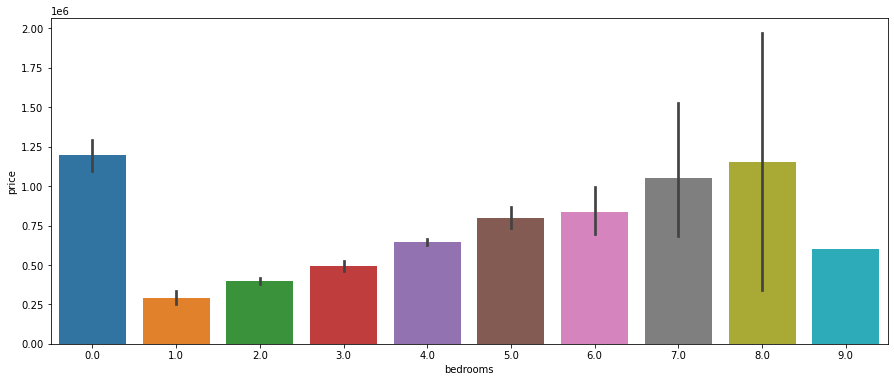

In [15]:
#Sabemos que hay 2 casas con 0 habitaciones y por eso vemos la relacion del nºhab con el precio
plt.figure(figsize=(15,6))
ax = sns.barplot(x=data['bedrooms'], y=data['price'])

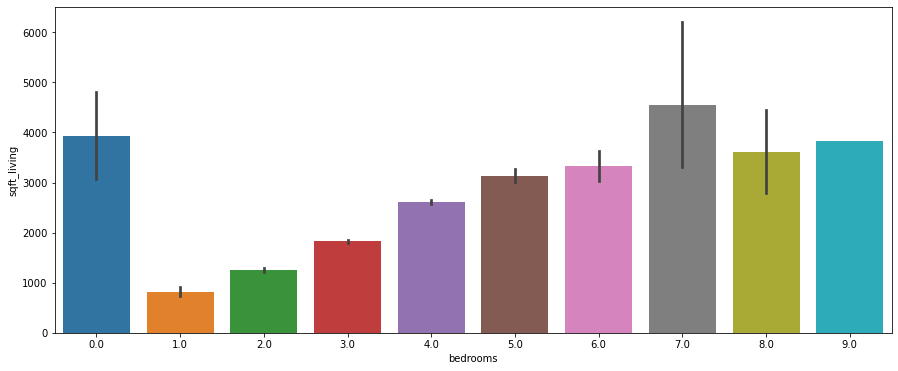

In [16]:
#Tambien vemos la relacion de estas casas con los "metros cuadrados"
plt.figure(figsize=(15,6))
ax = sns.barplot(x=data['bedrooms'], y=data['sqft_living'])

In [17]:
#Como hemos visto los datos de estas casas se asemejan mucho a las barras correspondientes a la casas con 8 habitaciones
#Asi que reemplazamos los ceros por ese valor
data['bedrooms'].replace(to_replace = 0, value = 8, inplace = True)
len(data[(data['bedrooms'] == 0)])

0

In [18]:
#Observamos que solo hay en torno a 20 casas con mas de 6 habitaciones
#Ademas sus precios maximos son menores y podrian ser malos para el modelo 
bedrooms = data.groupby(['bedrooms']).price.agg([len, min, max])
bedrooms

,len,min,max
bedrooms,,,
1.0,38,80000.0,635000.0
2.0,566,7800.0,1695000.0
3.0,2032,83300.0,26590000.0
4.0,1531,84350.0,4489000.0
5.0,353,185000.0,7062500.0
6.0,61,175000.0,3100000.0
7.0,14,280000.0,3200000.0
8.0,4,340000.0,1970000.0
9.0,1,599999.0,599999.0


In [19]:
#Primero eliminamos la unica casa con 9 habitaciones
data = data.loc[data["bedrooms"] < 9]
bedrooms = data.groupby(['bedrooms']).price.agg([len, min, max])
bedrooms

,len,min,max
bedrooms,,,
1.0,38,80000.0,635000.0
2.0,566,7800.0,1695000.0
3.0,2032,83300.0,26590000.0
4.0,1531,84350.0,4489000.0
5.0,353,185000.0,7062500.0
6.0,61,175000.0,3100000.0
7.0,14,280000.0,3200000.0
8.0,4,340000.0,1970000.0


In [20]:
#Unificamos en un solo grupo las casas de mas de 6 habitaciones
data['bedrooms'] = np.where((data.bedrooms > 6), 6, data.bedrooms)
bedrooms = data.groupby(['bedrooms']).price.agg([len, min, max])
bedrooms

,len,min,max
bedrooms,,,
1.0,38,80000.0,635000.0
2.0,566,7800.0,1695000.0
3.0,2032,83300.0,26590000.0
4.0,1531,84350.0,4489000.0
5.0,353,185000.0,7062500.0
6.0,79,175000.0,3200000.0


### Baños

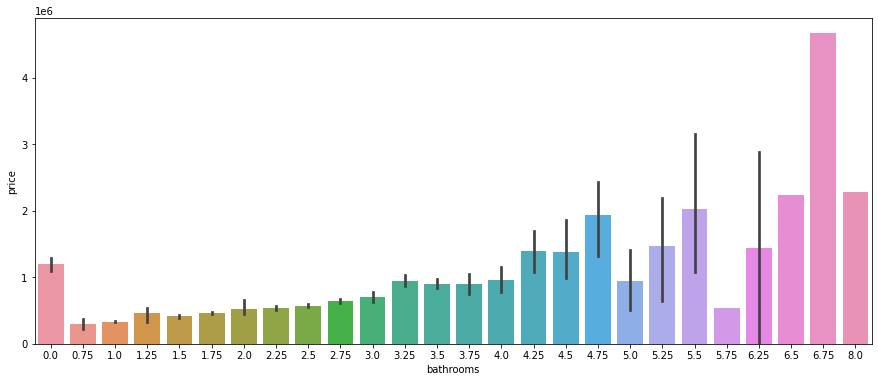

In [21]:
##Sabemos que hay 2 casas con 0 baños y por eso vemos la relacion del nºbaños con el precio
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bathrooms'], y=df['price'])

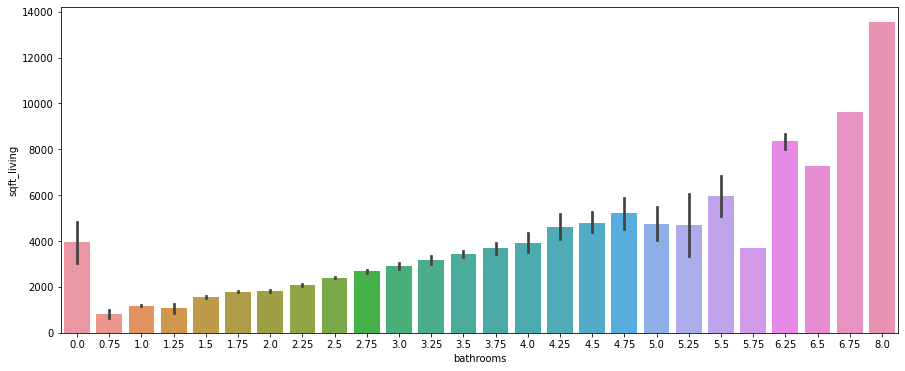

In [22]:
#Tambien vemos la relacion entre el numero de baños y los 'metros cuadrados'
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bathrooms'], y=df['sqft_living'])

In [23]:
#Como podemos ver en ambas graficas este valor se podria modificar por un valor entre 3 y 4, en este caso eligiremos 3,75
data['bathrooms'].replace(to_replace = 0, value = 3.75, inplace = True)
len(data[(data['bathrooms'] == 0)])

0

In [24]:
#Observamos todas las categorias de baños y la frencuencia con la que aparecen
bathrooms = data.groupby(['bathrooms']).price.agg([len, min, max])
bathrooms

,len,min,max
bathrooms,,,
0.75,17,80000.0,562100.0
1.00,743,7800.0,2110000.0
1.25,3,321950.0,545000.0
1.50,291,107500.0,2199900.0
1.75,629,120750.0,2100000.0
2.00,427,83300.0,26590000.0
2.25,419,132250.0,2400000.0
2.50,1189,168000.0,12899000.0
2.75,276,188000.0,2180000.0


In [25]:
#Vamos a agrupar todos los baños superiores a 4.75 en una unica categoria
data['bathrooms'] = np.where((data.bathrooms > 4.75 ), 5, data.bathrooms)
#Y las categorias con pocos valores como 0,75 y 1,25 se van a incluir en 1
data['bathrooms'] = np.where((data.bathrooms == 0.75), 1, data.bathrooms)
data['bathrooms'] = np.where((data.bathrooms == 1.25), 1, data.bathrooms)
bathrooms = data.groupby(['bathrooms']).price.agg([len, min, max])
bathrooms

,len,min,max
bathrooms,,,
1.00,763,7800.0,2110000.0
1.50,291,107500.0,2199900.0
1.75,629,120750.0,2100000.0
2.00,427,83300.0,26590000.0
2.25,419,132250.0,2400000.0
2.50,1189,168000.0,12899000.0
2.75,276,188000.0,2180000.0
3.00,167,235000.0,4489000.0
3.25,136,300000.0,2750000.0


### Nº de pisos

In [26]:
#Observamos que solo hay 2 casas con 3.5 habitaciones
floor = data.groupby(['floors']).price.agg([len , min, max])
floor

,len,min,max
floors,,,
1.0,2174,7800.0,26590000.0
1.5,444,132500.0,2453500.0
2.0,1811,84350.0,7062500.0
2.5,40,195000.0,3200000.0
3.0,128,288790.0,3100000.0
3.5,2,563500.0,1095000.0


In [27]:
#Añadimos esas dos casas en la categoria de 3 suelos
data['floors'] = np.where((data.floors == 3.5 ), 3, data.floors)

### Condición de las viviendas

In [28]:
#Observamos que solo hay 6 casas con 1 'estrella' en condicion
floor = data.groupby(['condition']).price.agg([len , min, max])
floor

,len,min,max
condition,,,
1,6,7800.0,550000.0
2,32,80000.0,2555000.0
3,2874,83000.0,12899000.0
4,1252,83300.0,26590000.0
5,435,83300.0,3200000.0


In [29]:
#Añadimos esas 6 casas en la categoria de 2 'estrellas' para unificar 
data['condition'] = np.where((data.condition == 1 ), 3, data.condition)

## Lidiando con los valores extremos(Outliners)

### 1.Precio

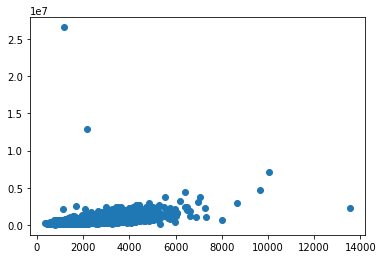

In [30]:
#Hemos observado que la diferencia entre el valor del precio que representaria el 75% y el maximo es demasiado grande
plt.scatter(x = data['sqft_living'], y = data['price'])
plt.show()
#Tener este tipo de valores hace mas dificil la visualizacion de graficas 

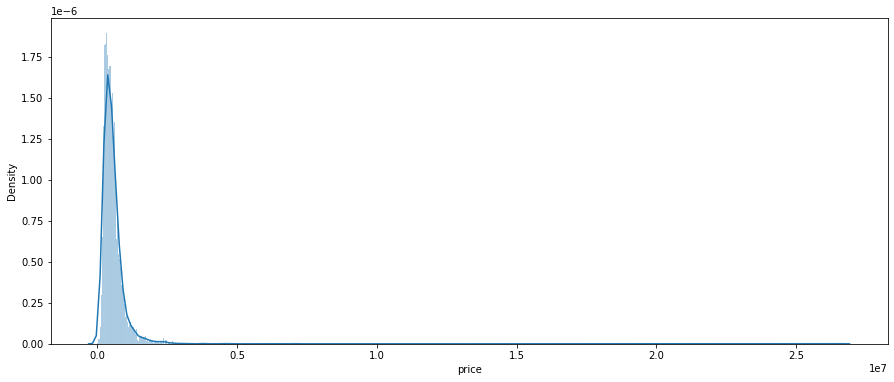

In [31]:
#Vemos como la mayoria de casas se comprenden en un rango mas reducido del que aparece en la grafica
plt.figure(figsize=(15,6))
ax = sns.histplot(data['price'], kde=True, stat="density", 
     kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))

In [32]:
#Para solucionar esto usamos un procedimiento de desviación estandar (Z Score) 
#Se escoge 3 como limite ya que es lo estandar en este procedimiento
from scipy import stats
data['price'] = data['price'].replace([df['price'][np.abs(stats.zscore(df['price'])) > 3]],np.median(data['price']))

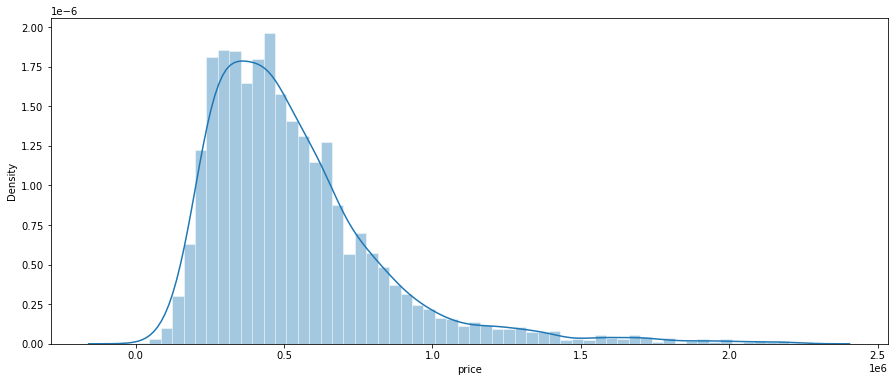

In [33]:
#Tras aplicar el procedimiento observamos en la grafica que los outliners han sido sustituidos por la media
plt.figure(figsize=(15,6))
ax = sns.histplot(data['price'], kde=True, stat="density", 
     kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))

### 2.Sqft_living (Superficie total)

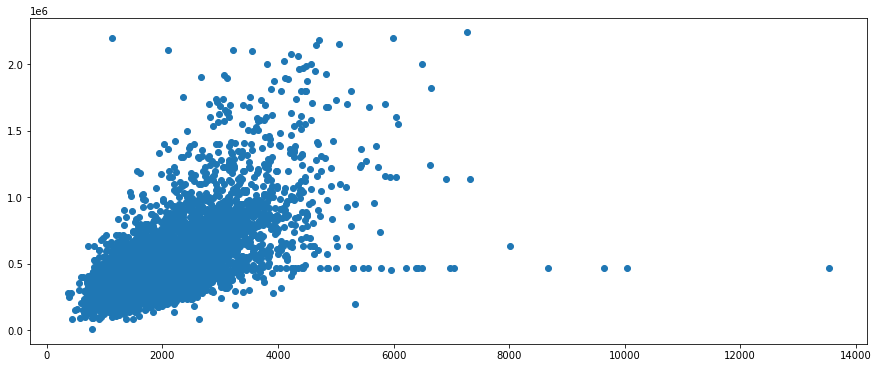

In [34]:
#Observamos que en sqft_living tambien hay valores atipicos o extremos
plt.figure(figsize=(15,6))
plt.scatter(x = data['sqft_living'], y = data['price'])
plt.show()

In [35]:
#Comprobamos cuantas casas tienen un valor mas alto de 6000 'metroscuadrados'
len(data[(data['sqft_living'] > 6000)])

20

In [36]:
#Reemplazamos esos veinte valores por 6000
data['sqft_living'] = np.where((data.sqft_living > 6000 ), 6000, data.sqft_living)
len(data[(data['sqft_living'] > 6000)])

0

### 3.Sqft_above (Superficie total menos Garajes y sotanos)

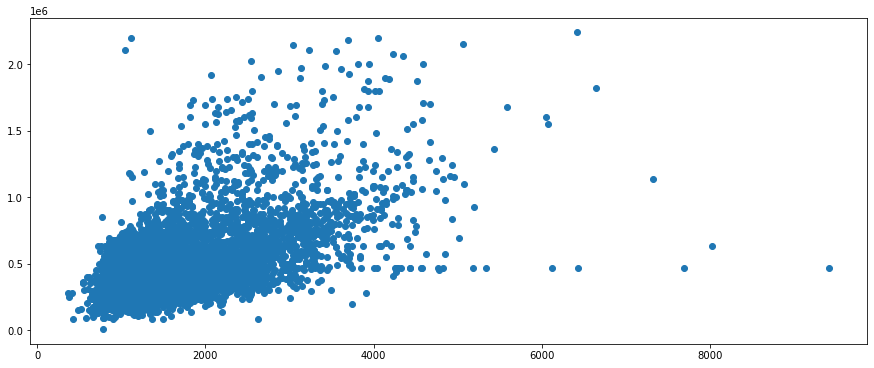

In [37]:
##Observamos que en sqft_above tambien hay valores atipicos o extremos asi que realizamos el mismo proceso
plt.figure(figsize=(15,6))
plt.scatter(x = data['sqft_above'], y = data['price'])
plt.show()

In [38]:
len(data[(data['sqft_above'] > 5000)])

18

In [39]:
data['sqft_above'] = np.where((data.sqft_above >5000 ), 5000, data.sqft_above)
len(data[(data['sqft_above'] > 5000)])

0

### 4.Sqft_basement(Superficie Sotano)

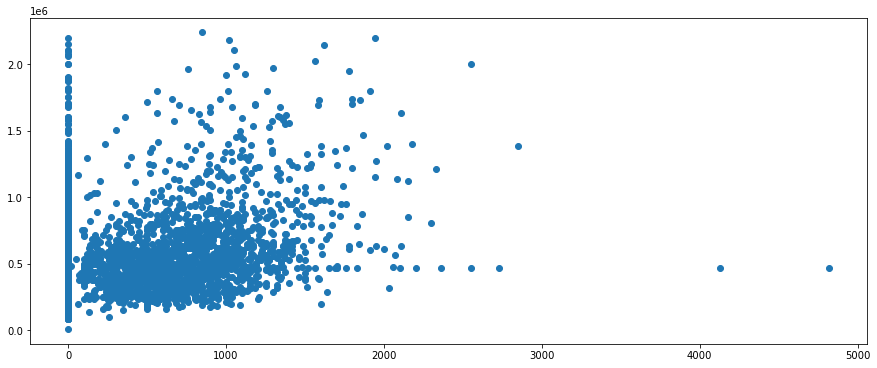

In [40]:
#En este caso vemos un gran numero de casas con valor 0, pero podria indicar que son vivienas sin sotano
plt.figure(figsize=(15,6))
plt.scatter(x = data['sqft_basement'], y = data['price'])
plt.show()

In [41]:
len(data[(data['sqft_basement'] > 2000)])

21

In [42]:
#Nos centramos en reemplazar los valores atipicamente grandes como anteriormente
data['sqft_basement'] = np.where((data.sqft_basement >2000 ), 2000, data.sqft_basement)
len(data[(data['sqft_basement'] > 2000)])

0

# Eliminando columnas innecesarias

<AxesSubplot:>

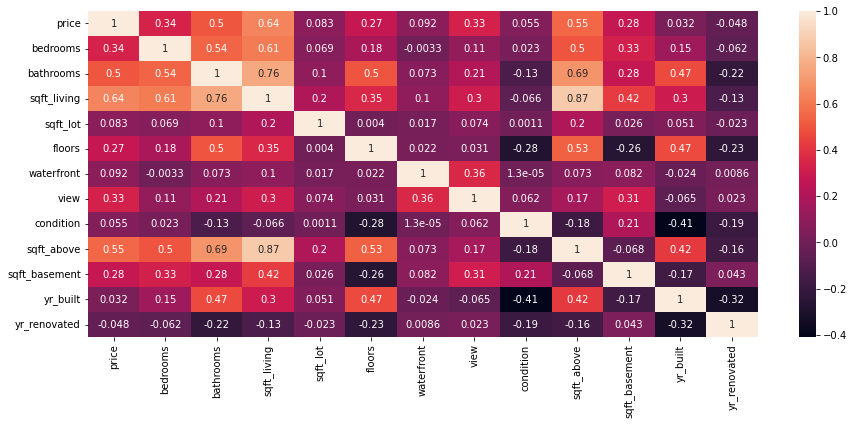

In [43]:
#Observamos de nuevo la correlacion de ciertas caracteristicas con el precio
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot = True)

In [44]:
#Eliminamos las columnas que tienen muy poca correlación con el precio
data.drop(['date','yr_built','yr_renovated','sqft_lot', 'waterfront', 'condition'], axis=1, inplace = True)

In [45]:
#Por otro lado vemos que la correlacion entre 'sqft_living' y 'sqft_above' es altisima, casi de 1
#Hay que eliminar una de ellas ya que esto puede ser malo para el modelo 
#Eligimos sqft_above ya que entre las dos es la que menos correlacion tiene con el precio
data.drop(['sqft_above'], axis=1, inplace = True)

In [46]:
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_basement,street,city,statezip,country
0,313000.0,3.0,1.50,1340,1.5,0,0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,468500.0,5.0,2.50,3650,2.0,4,280,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,1.0,0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,1.0,0,1000,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,1.0,0,800,9105 170th Ave NE,Redmond,WA 98052,USA


In [47]:
#Observamos que todas las entradas de pais pertenecen a USA por lo tanto eliminamos esa columna
data['country'].value_counts()

USA    4599
Name: country, dtype: int64

In [48]:
#El caso contrario pasa con la calle, cada casa practicamente esta en una calle diferente por ello las eliminamos tambien
df['street'].nunique()

4525

In [49]:
data.drop(['country', 'street'], axis=1, inplace = True)

## ¿Que hacemos con los codigos postales y las ciudades?

In [50]:
#Usamos one hot encoding(get_dummies) para transformar de datos categoricos a una representación vectorial binaria

In [51]:
data = pd.get_dummies(data, columns=['statezip'], prefix = ['statezip'])

In [52]:
data = pd.get_dummies(data, columns=['city'], prefix = ['city'])
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_basement,statezip_WA 98001,statezip_WA 98002,statezip_WA 98003,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,1.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,468500.0,5.0,2.50,3650,2.0,4,280,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,1.0,0,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,1.0,0,800,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Definiendo el modelo

In [53]:
X = data.drop(["price"],axis = 1)
y = data["price"]

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state = 11)
#Comprobamos que el split se haya hecho correctamente
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((3679, 127), (920, 127), (3679,), (920,))

In [55]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [56]:
#Obtenemos una precion del 70% 
linreg.fit(X_train, y_train)
linreg.score(X_train, y_train)*100

69.26019802860428

In [57]:
#Obtenemos un error cuadratico medio de unos 150k dolares
from sklearn import metrics
y_pred = linreg.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred, squared=False))

164430.93337479918


In [58]:
#Obtenemos un error abosoluto medio de unos 95k dolares
y_pred = linreg.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred))

94909.3339436472


In [59]:
print(linreg.intercept_)
print(linreg.coef_)

135751.65846719564
[-2.11644796e+03  1.41644207e+04  1.87332700e+02 -2.95989720e+04
  5.86419324e+04 -7.99191612e+01 -4.80953967e+04 -4.19470902e+04
 -1.05821272e+05  3.48412308e+05  6.09746277e+04  4.25907021e+03
 -1.83975413e+04 -1.25684939e+05 -1.47441537e+04 -2.18826421e+04
 -2.31739744e+04 -5.27925251e+04 -7.87010228e+04 -1.11381634e+05
  1.99252218e+03  1.58845995e+04 -1.66611351e+04  8.24636454e+04
 -5.32668315e+04 -3.71389755e+04 -6.81056043e+04  1.44862321e+05
 -4.36032263e+04 -7.94171413e+04  2.31384635e+04  1.51785567e+05
 -4.25683340e+04 -4.35651961e+04 -9.49148404e+04  3.01558736e+04
 -5.93231132e+04  3.85217649e+04 -3.64128258e+03 -7.70483709e+03
  1.20807091e+04 -7.54944426e+04 -1.58564127e+04  2.18695027e+04
 -4.07226043e+04  3.47985540e+04 -2.63582063e+04 -5.34384149e+03
 -2.21651476e+04  2.15890857e+04  1.78127314e+04 -7.01881912e+04
  2.15385848e+05  1.11855850e+05  2.72819212e+05 -1.27691496e+05
  8.66977042e+04 -9.30721424e+04  3.84843481e+05  3.61777220e+05
  9.55

In [60]:
#Probando otro algoritmo
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [61]:
regressor.predict(X_test)
regressor.score(X_test, y_test)

0.6645403842844657

In [62]:
y_pred = regressor.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred, squared=False))

160539.61407511542


In [63]:
y_pred = regressor.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred))

94455.32518833947
